<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analysis-of-Incentives" data-toc-modified-id="Analysis-of-Incentives-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analysis of Incentives</a></span><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Set Up</a></span><ul class="toc-item"><li><span><a href="#Imports-and-Functions" data-toc-modified-id="Imports-and-Functions-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Imports and Functions</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Estimating-Cost-of-Installation" data-toc-modified-id="Estimating-Cost-of-Installation-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Estimating Cost of Installation</a></span></li><li><span><a href="#When-is-PV-Installation-Economical?" data-toc-modified-id="When-is-PV-Installation-Economical?-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>When is PV Installation Economical?</a></span></li></ul></li><li><span><a href="#State-&amp;-Federal-Tax-Incentives" data-toc-modified-id="State-&amp;-Federal-Tax-Incentives-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>State &amp; Federal Tax Incentives</a></span><ul class="toc-item"><li><span><a href="#Calculations" data-toc-modified-id="Calculations-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Calculations</a></span></li><li><span><a href="#Selection-and-Plotting" data-toc-modified-id="Selection-and-Plotting-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Selection and Plotting</a></span></li></ul></li><li><span><a href="#Capped-Payments-for-Emissions-Avoided" data-toc-modified-id="Capped-Payments-for-Emissions-Avoided-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Capped Payments for Emissions Avoided</a></span></li></ul></li></ul></div>

## Analysis of Incentives

Two incentives currently exist for building owners in Massachusetts to install solar panels on their properties: 

- A 15% state tax credit or \$1,000, whichever value is less, towards the cost of installation; and
- A 26% federal tax credit towards the cost of installation (declining to 22% in 2023 before expiring at the end of the year)

Other options that have so far gone unimplemented in the state include, for example:

- Ongoing (annual) payments or "credits" for the carbon emissions avoided through the use of solar energy to power a building;
    - \$3.00 per Metric ton of CO2e (MTCO2e)
    - \$45.00 per MTCO2e
    - \$120.00 per MTCO2e
- Solar net-metering credits by a state-bsaed utility, for example Eversource

Further permutations exist. For example, the annual payments for carbon emissions avoided, if coming from the state, could have a limited budget (say, \$1 million). On the other hand, perhaps these are executed through a carbon offset exchange service, which would have no budget. 

This analysis will compare the effects of the following incentive programs on rooftop solar adoption:

- The current state tax credit (15\%)
- The current federal tax credit (26\%)
- The 2023 federal tax credit (22\%)
- The 2024 federal tax credit (0\%)
- Annual payments with a budget cap of \$1 million:
    - \$3.00 per MTCO2e
    - \$45.00 per MTCO2e
    - \$120.00 per MTCO2e
- RECs (Renewable Energy Credits)
- Carbon offset payments

### Set Up

#### Imports and Functions 

In [121]:
# Define functions for data & viz output locations

def dataDir(x):
    return '/home/lucia/bu/year4/semester1/EE508/project/ma-solar/data/analysisReady/' + x

def outputDir(x):
    return '/home/lucia/bu/year4/semester1/EE508/project/ma-solar/output/' + x

In [3]:
# Import libraries

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

#### Load Data

In [84]:
data         = gpd.read_file(dataDir('roofsSolarIncomeTaxesEmissions.shp'))
townOutlines = gpd.read_file(dataDir('isolMA.shp')).to_crs('EPSG:4326')
existPV      = pd.read_csv(dataDir('existingPVSummary.csv'), index_col=0)

#### Estimating Cost of Installation

In [102]:
mean = (2.71 + 1.72) / 2

cond1 = (data['kW'] > 3) & (data['kW'] <= 7)
cond2 = (data['kW'] > 7) & (data['kW'] <= 100)
cond3 = (data['kW'] > 100) & (data['kW'] <= 2000)
cond4 = (data['kW'] <= 3) | (data['kW'] > 2000)

values = [2.71, round(mean, 2), 1.72, 0.00]

data['cost/W'] = np.select([cond1, cond2, cond3, cond4], values,
                                      default=0)

In [103]:
data['PVcostEst'] = (data['kW']*1000) * data['cost/W']
data['PVcostEst'] = round(data['PVcostEst'], 2)

data

,STRUCT_ID,SOURCE,TOWN_ID,TOWN_ID2,LOCAL_ID,AREA_SQ_FT,AREA_SQMI,index,CITY_TOWN,COUNTY,...,potent_kW,kW,wAvgInc_l,wAvgInc_u,MAIncomeT,fedIncomeT,emAvo_lbs,geometry,cost/W,PVcostEst
0,228564_891904,City of Boston,35,0,Bos_2003474000_B1,524.705830,5.350249,West Roxbury,BOSTON,SUFFOLK,...,8.046628,7.161499,122698.96,143978.48,6134.95,29447.75,67288.281878,"POLYGON ((-71.15372 42.27713, -71.15366 42.277...",2.21,15826.91
1,228744_891768,City of Boston,35,0,Bos_2003510000_B0,1235.985434,5.350249,West Roxbury,BOSTON,SUFFOLK,...,18.959242,16.873725,122698.96,143978.48,6134.95,29447.75,158542.794325,"POLYGON ((-71.15152 42.27592, -71.15150 42.275...",2.21,37290.93
2,228721_891681,City of Boston,35,0,Bos_2003527000_B0,1281.687169,5.350249,West Roxbury,BOSTON,SUFFOLK,...,19.660278,17.497647,122698.96,143978.48,6134.95,29447.75,164405.064794,"POLYGON ((-71.15184 42.27513, -71.15183 42.275...",2.21,38669.80
3,229467_887834,City of Boston,35,0,Bos_1812932003_B0,1107.685557,4.440987,Hyde Park,BOSTON,SUFFOLK,...,16.965452,15.099252,114557.15,131788.90,5727.86,27493.72,141870.131884,"POLYGON ((-71.14295 42.24045, -71.14295 42.240...",2.21,33369.35
4,229842_887062,City of Boston,35,0,Bos_1812996000_B0,1235.355673,4.440987,Hyde Park,BOSTON,SUFFOLK,...,18.901736,16.822545,99979.08,118817.14,4998.95,23994.98,158061.914103,"POLYGON ((-71.13836 42.23341, -71.13835 42.233...",2.21,37177.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65244,232602_889575,MAGIS,189,0,None,3318.360000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,50.862990,45.268061,118273.92,133574.65,5913.70,28385.74,425331.378798,"POLYGON ((-71.10502 42.25603, -71.10494 42.256...",2.21,100042.42
65245,233037_889542,MAGIS,189,0,None,2043.410000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,31.328788,27.882622,97230.77,118835.62,4861.54,23335.38,261980.602693,"POLYGON ((-71.09964 42.25556, -71.09974 42.255...",2.21,61620.59
65246,233261_889588,MAGIS,189,0,None,1100.700000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,16.879788,15.023011,97230.77,118835.62,4861.54,23335.38,141153.781120,"POLYGON ((-71.09689 42.25599, -71.09698 42.256...",2.21,33200.85
65247,234126_889280,MAGIS,189,0,None,1562.920000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,23.962098,21.326267,126930.05,138403.67,6346.50,30463.21,200378.153949,"POLYGON ((-71.08648 42.25316, -71.08655 42.253...",2.21,47131.05


#### When is PV Installation Economical?

In [22]:
# Compute the mean cost of installation in each town, from existing PV data

meanCostNewton = existPV.loc['Newton', 'avgFinalCost']
meanCostMilton = existPV.loc['Milton', 'avgFinalCost']
meanCostWR     = existPV.loc['West Roxbury', 'avgFinalCost']
meanCostHP     = existPV.loc['Hyde Park', 'avgFinalCost']

In [14]:
# Does this make sense for the rooftop data?
# For example, are there any for whom the mean cost is still >= annual income?

print(len(data[data['wAvgInc_l'].le(meanCostNewton) & 
               data['index'].eq('Newton')]))

print(len(data[data['wAvgInc_l'].le(meanCostMilton) & 
               data['index'].eq('Milton')]))

print(len(data[data['wAvgInc_l'].le(meanCostWR) & 
               data['index'].eq('West Roxbury')]))

print(len(data[data['wAvgInc_l'].le(meanCostHP) & 
               data['index'].eq('Hyde Park')]))

# Yes: 6 in West Roxbury and 46 in Hyde Park (none in Newton or Milton)

0
0
6
46


In [23]:
# Locate those roofs

iWR  = data['wAvgInc_l'].le(meanCostWR)
iWR &= data['index'].eq('West Roxbury')

iHP  = data['wAvgInc_l'].le(meanCostHP)
iHP &= data['index'].eq('Hyde Park')

notEcon = data.loc[iWR | iHP]
notEcon

,STRUCT_ID,SOURCE,TOWN_ID,TOWN_ID2,LOCAL_ID,AREA_SQ_FT,AREA_SQMI,index,CITY_TOWN,COUNTY,...,potent_kW,kW,wAvgInc_l,wAvgInc_u,MAIncomeT,fedIncomeT,emAvo_lbs,geometry,cost/W,PVcostEst
66,230358_891515,City of Boston,35,0,None,66.706708,4.440987,Hyde Park,BOSTON,SUFFOLK,...,1.023239,0.910683,0.0,0.0,0.0,0.0,8.556628e+06,"POLYGON ((-71.13197 42.27352, -71.13199 42.273...",0.00,0.00
128,229996_889080,City of Boston,35,0,Bos_1812172000_B8,768.752695,4.440987,Hyde Park,BOSTON,SUFFOLK,...,11.780273,10.484443,0.0,0.0,0.0,0.0,9.851013e+07,"POLYGON ((-71.13643 42.25162, -71.13648 42.251...",2.21,23170.62
157,229386_891779,City of Boston,35,0,None,7833.626557,5.350249,West Roxbury,BOSTON,SUFFOLK,...,120.102197,106.890955,0.0,0.0,0.0,0.0,1.004330e+09,"POLYGON ((-71.14360 42.27586, -71.14360 42.275...",1.72,183852.44
1015,229894_888818,City of Boston,35,0,Bos_1812172000_B0,36240.718972,4.440987,Hyde Park,BOSTON,SUFFOLK,...,555.067435,494.010017,0.0,0.0,0.0,0.0,4.641638e+09,"POLYGON ((-71.13739 42.24954, -71.13735 42.249...",1.72,849697.23
1044,230010_889056,City of Boston,35,0,Bos_1812172000_B6,1373.677764,4.440987,Hyde Park,BOSTON,SUFFOLK,...,21.050071,18.734563,0.0,0.0,0.0,0.0,1.760269e+08,"POLYGON ((-71.13638 42.25146, -71.13637 42.251...",2.21,41403.38
1045,229814_888968,City of Boston,35,0,Bos_1812172000_B7,1013.932292,4.440987,Hyde Park,BOSTON,SUFFOLK,...,15.533450,13.824771,0.0,0.0,0.0,0.0,1.298953e+08,"POLYGON ((-71.13863 42.25062, -71.13872 42.250...",2.21,30552.74
1105,230397_891439,City of Boston,35,0,Bos_1806105000_B1,314.517947,4.440987,Hyde Park,BOSTON,SUFFOLK,...,4.824508,4.293812,0.0,0.0,0.0,0.0,4.034397e+07,"POLYGON ((-71.13147 42.27283, -71.13148 42.272...",2.71,11636.23
1407,229388_891738,City of Boston,35,0,None,10380.792114,5.350249,West Roxbury,BOSTON,SUFFOLK,...,159.154375,141.647393,0.0,0.0,0.0,0.0,1.330896e+09,"POLYGON ((-71.14371 42.27540, -71.14374 42.275...",1.72,243633.52
2124,230313_891149,City of Boston,35,0,None,258.548293,4.440987,Hyde Park,BOSTON,SUFFOLK,...,3.963965,3.527928,0.0,0.0,0.0,0.0,3.314784e+07,"POLYGON ((-71.13251 42.27023, -71.13251 42.270...",2.71,9560.69
3316,230038_888735,City of Boston,35,0,None,114.478058,4.440987,Hyde Park,BOSTON,SUFFOLK,...,1.753360,1.560491,0.0,0.0,0.0,0.0,1.466212e+07,"POLYGON ((-71.13598 42.24848, -71.13600 42.248...",0.00,0.00


In [24]:
# Many of these rooftops are actually too small to merit intalling a PV
# system (<1 kW of production)

notEcon = notEcon[notEcon['kW'].ge(1.00)]

# And some of those remaining smaller than the minimum size recorded in
# the cost estimates from NREL - these won't be useful

notEcon = notEcon[notEcon['PVcostEst'].gt(0.00)]

# Still leaves 27: what are the incomes?

notEcon[['wAvgInc_l', 'PVcostEst']] 

# These are the roofs in the blocks that had no income data - filled with 0.0
# (they won't be useful for analysis either)

,wAvgInc_l,PVcostEst
128,0.0,23170.62
157,0.0,183852.44
1015,0.0,849697.23
1044,0.0,41403.38
1045,0.0,30552.74
1105,0.0,11636.23
1407,0.0,243633.52
2124,0.0,9560.69
5424,0.0,174308.76
6926,0.0,21362.81


In [25]:
# Establish a general threshold for the % of income that a system would cost
# in order for adoption to be economical, based on existing installation data

avgIncomeHP = data[data['index'].eq('Hyde Park')]['wAvgInc_l'].mean()
avgIncomeWR = data[data['index'].eq('West Roxbury')]['wAvgInc_l'].mean()
avgIncomeM  = data[data['index'].eq('Milton')]['wAvgInc_l'].mean()
avgIncomeN  = data[data['index'].eq('Newton')]['wAvgInc_l'].mean()

print(round((meanCostHP / avgIncomeHP), 2) * 100)
print(round((meanCostWR / avgIncomeWR), 2) * 100)
print(round((meanCostMilton / avgIncomeM), 2) * 100)
print(round((meanCostNewton / avgIncomeN), 2) * 100)

print('mean %: ' + str((33 + 26 + 29 + 23) / 4))

33.0
26.0
28.999999999999996
23.0
mean %: 27.75


Obviously, there are multiple criteria for when rooftop PV installation is both practical and economical:

1. At least 1 kW of estimated yearly production
2. The final cost is not greater than ~ 28% of annual income (from estimates using existing installations in each town)

### State & Federal Tax Incentives

#### Calculations

In [101]:
data.columns

Index(['STRUCT_ID', 'SOURCE', 'TOWN_ID', 'TOWN_ID2', 'LOCAL_ID', 'AREA_SQ_FT',
       'AREA_SQMI', 'index', 'CITY_TOWN', 'COUNTY', 'TRACTA', 'BLKGRPA',
       'NAME_E', 'NAME_M', 'GHIkWh/m^2', 'area_sq_m', 'potent_kWh',
       'potent_kW', 'kW', 'wAvgInc_l', 'wAvgInc_u', 'MAIncomeT', 'fedIncomeT',
       'emAvo_lbs', 'geometry'],
      dtype='object')

In [104]:
# MA tax credit: 15% (up to $1000)

cond1 = (data['MAIncomeT'] * 0.15) < 1000
cond2 = (data['MAIncomeT'] * 0.15) >= 1000

values = [data['MAIncomeT'] * 0.15, 1000]

data['incentMA'] = np.select([cond1, cond2], values, default=0)

In [105]:
# Current federal tax credit: 26%
data['incentFed22'] = data['fedIncomeT'] * 0.26

# 2023 federal tax credit: 22%
data['incentFed23'] = data['fedIncomeT'] * 0.22

# 2024 federal tax credit: 0%
data['incentFed24'] = data['fedIncomeT'] * 0

In [106]:
# Final cost of installation with the incentives

inc = ['incentMA', 'incentFed22', 'incentFed23', 'incentFed24']

data['PVcostMA']       = data['PVcostEst'] - data['incentMA']
data['PVcostMA+Fed22'] = data['PVcostEst'] - (data['incentMA'] + data['incentFed22'])
data['PVcostMA+Fed23'] = data['PVcostEst'] - (data['incentMA'] + data['incentFed23'])
data['PVcostMA+Fed24'] = data['PVcostEst'] - (data['incentMA'] + data['incentFed24'])

data

,STRUCT_ID,SOURCE,TOWN_ID,TOWN_ID2,LOCAL_ID,AREA_SQ_FT,AREA_SQMI,index,CITY_TOWN,COUNTY,...,cost/W,PVcostEst,incentMA,incentFed22,incentFed23,incentFed24,PVcostMA,PVcostMA+Fed22,PVcostMA+Fed23,PVcostMA+Fed24
0,228564_891904,City of Boston,35,0,Bos_2003474000_B1,524.705830,5.350249,West Roxbury,BOSTON,SUFFOLK,...,2.21,15826.91,920.2425,7656.4150,6478.5050,0.0,14906.6675,7250.2525,8428.1625,14906.6675
1,228744_891768,City of Boston,35,0,Bos_2003510000_B0,1235.985434,5.350249,West Roxbury,BOSTON,SUFFOLK,...,2.21,37290.93,920.2425,7656.4150,6478.5050,0.0,36370.6875,28714.2725,29892.1825,36370.6875
2,228721_891681,City of Boston,35,0,Bos_2003527000_B0,1281.687169,5.350249,West Roxbury,BOSTON,SUFFOLK,...,2.21,38669.80,920.2425,7656.4150,6478.5050,0.0,37749.5575,30093.1425,31271.0525,37749.5575
3,229467_887834,City of Boston,35,0,Bos_1812932003_B0,1107.685557,4.440987,Hyde Park,BOSTON,SUFFOLK,...,2.21,33369.35,859.1790,7148.3672,6048.6184,0.0,32510.1710,25361.8038,26461.5526,32510.1710
4,229842_887062,City of Boston,35,0,Bos_1812996000_B0,1235.355673,4.440987,Hyde Park,BOSTON,SUFFOLK,...,2.21,37177.83,749.8425,6238.6948,5278.8956,0.0,36427.9875,30189.2927,31149.0919,36427.9875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65244,232602_889575,MAGIS,189,0,None,3318.360000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,2.21,100042.42,887.0550,7380.2924,6244.8628,0.0,99155.3650,91775.0726,92910.5022,99155.3650
65245,233037_889542,MAGIS,189,0,None,2043.410000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,2.21,61620.59,729.2310,6067.1988,5133.7836,0.0,60891.3590,54824.1602,55757.5754,60891.3590
65246,233261_889588,MAGIS,189,0,None,1100.700000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,2.21,33200.85,729.2310,6067.1988,5133.7836,0.0,32471.6190,26404.4202,27337.8354,32471.6190
65247,234126_889280,MAGIS,189,0,None,1562.920000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,2.21,47131.05,951.9750,7920.4346,6701.9062,0.0,46179.0750,38258.6404,39477.1688,46179.0750


#### Selection and Plotting

In [115]:
townOutlines

,index,CITY_TOWN,COUNTY,SHAPE_AREA,SHAPE_LEN,geometry
0,West Roxbury,BOSTON,SUFFOLK,1.385708e+07,20667.534565,"POLYGON ((-71.15579 42.29739, -71.15521 42.296..."
1,Newton,NEWTON,MIDDLESEX,4.642158e+07,39827.270302,"POLYGON ((-71.17880 42.31415, -71.17688 42.312..."
2,Milton,"MILTON, TOWN OF",NORFOLK,3.444044e+07,34990.841095,"MULTIPOLYGON (((-71.04997 42.27739, -71.04984 ..."
3,Hyde Park,BOSTON,SUFFOLK,1.151738e+07,19882.474830,"POLYGON ((-71.10916 42.27433, -71.10862 42.273..."


In [133]:
def plot_scenario(selection, scenario_text, scenario_to_file):
    
    fig1, ax1 = plt.subplots()
    fig1.set_size_inches(8, 8)
    
    townOutlines.plot(ax=ax1, color='None', edgecolor='black')
    selection.plot(ax=ax1, color='darkblue')
    
    # Town labels
    ax1.text(-71.180, 42.362, 'Newton')
    ax1.text(-71.085, 42.275, 'Milton')
    ax1.text(-71.165, 42.307, 'West Roxbury')
    ax1.text(-71.135, 42.280, 'Hyde Park')
    
    ax1.set_title('Rooftops Now Adopting PV Under ' + scenario_text)
    ax1.set_axis_off()
    
    fig1.savefig(outputDir('viz/adopted' + scenario_to_file + '.png'), dpi=150)

In [129]:
def plot_scenario_by_town(selection, scenario_text, scenario_to_file):
    
    towns = ['Newton', 'Milton', 'West Roxbury', 'Hyde Park']
    
    for i in range(len(towns)):
        
        t = towns[i]
        
        fig2, ax2 = plt.subplots()
        fig2.set_size_inches(8, 8)
        
        # Plot each town outline
        outline = townOutlines[townOutlines['index'].eq(t)]
        outline.plot(ax=ax2, color='None', edgecolor='black')
    
        # Plot the rooftops now adopting solar in each town
        sel = selection[selection['index'].eq(t)]
        sel.plot(ax=ax2, color='darkblue') 
    
        ax2.set_title('Rooftops Now Adopting PV in ' + t + ' Under ' + 
                      scenario_text)
        ax2.set_axis_off()
        
        fig2.savefig(outputDir('viz/adopted' + t + scenario_to_file + '.png'), 
                     dpi=150)

In [142]:
def selections_stateFed(data, scenario_text, yr):
    
    data_c = data.copy()
    
    inc  = ''
    cost = ''
    
    if yr == '22':
        inc = 'incentFed22'
        cost = 'PVcostMA+Fed22'
    elif yr == '23':
        inc = 'incentFed23'
        cost = 'PVcostMA+Fed23'
    elif yr == '24':
        inc = 'incentFed24'
        cost = 'PVcostMA+Fed24'
    else:
        raise Exception('yr must be a String: 22, 23, or 24.')
    
    N_N  = []  # number of new adoptions in Newton
    N_M  = []  # number of new adoptions in Milton
    N_WR = []  # number of new adoptions in West Roxbury
    N_HP = []  # number of new adoptions in Hyde Park
    N    = []  # total number of new adoptions
    A = []     # total area
    M = []     # total MW generated
    E = []     # total emissions avoided
    C_M  = []  # total cost for MA 
    C_F  = []  # total cost for the govt.
    C_T  = []  # total budget for the payments
    C_I  = []  # total cost for individuals
    mC_I = []  # mean cost for individuals
        
    # Select roofs for which rooftop PV adoption is 'economical'
    i_sel = data_c[cost].lt(data_c['wAvgInc_l']*0.28)
    selected = data_c[i_sel]
    
    # Count how many roofs were selected in Newton
    n_n = len(selected[selected['index'].eq('Newton')])
    N_N.append(n_n)
        
    # Count how many roofs were selected in Milton
    n_m = len(selected[selected['index'].eq('Milton')])
    N_M.append(n_m)
        
    # Count how many roofs were selected in West Roxbury
    n_wr = len(selected[selected['index'].eq('West Roxbury')])
    N_WR.append(n_wr)
        
    # Count how many roofs were selected in Hyde Park
    n_hp = len(selected[selected['index'].eq('Hyde Park')])
    N_HP.append(n_hp)
        
    # Count how many roofs were selected in total
    n = len(selected)
    N.append(n)
    
    # Compute the total area in square kilometers
    area = round(selected['area_sq_m'].sum() / 1000000, 2)
    A.append(area)
    
    # Compute the total MW generated 
    MW = round(selected['kW'].sum() * 0.001, 2)
    M.append(MW)
    
    # Compute the total emissions saved and convert to MTCO2e
    em = selected['emAvo_lbs'].sum() / 2205
    em = round(em, 2)
    E.append(em)
    
    # Compute the total cost for the state
    costMA = round(selected['incentMA'].sum(), 2)
    C_M.append(costMA)
        
    # Compute the total cost for the fed. govt.
    costF = round(selected[inc].sum(), 2)
    C_F.append(costF)
    
    # Compute the total budget
    costT = round(costMA + costF, 2)
    C_T.append(costT)
    
    # Compute the total cost for the building owners
    costInd = round(selected['PVcostMA'].sum(), 2)
    C_I.append(costInd)
    
    # Compute the average cost for the building owners
    meanCostInd = round(selected['PVcostMA'].mean(), 2)
    mC_I.append(meanCostInd)
    
    
    results = pd.DataFrame(zip(N, N_N, N_M, N_WR, N_HP, A, M, E, C_M, C_F, 
                               C_T, C_I, mC_I),
                          columns=['N', 'nNewton', 'nMilton',  
                                   'nWestRoxbury', 'nHydePark', 'area_km^2', 
                                   'MW', 'avoidedMTCO2e', 'costForMA', 
                                   'costForFed', 'totalBudget',
                                   'costForIndividuals',
                                   'avgCostForIndividuals'],
                          index=[scenario_text])
    
    return selected, results

In [145]:
# Get the results

stateFed22 = selections_stateFed(data, 'MA+FedIncent22', '22')
stateFed23 = selections_stateFed(data, 'MA+FedIncent23', '23')
stateFed24 = selections_stateFed(data, 'MA+FedIncent24', '24')

sel22 = stateFed22[0]  # shapes
res22 = stateFed22[1]  # table of results

sel23 = stateFed23[0]  # shapes
res23 = stateFed23[1]  # table of results

sel24 = stateFed24[0]  # shapes
res24 = stateFed24[1]  # table of results

In [147]:
outcomes = res22.append(res23).append(res24)
outcomes

,N,nNewton,nMilton,nWestRoxbury,nHydePark,area_km^2,MW,avoidedMTCO2e,costForMA,costForFed,totalBudget,costForIndividuals,avgCostForIndividuals
MA+FedIncent22,35968,14863,7046,8150,5909,2.83,415.16,1769044.66,30835011.82,2.698142e+08,3.006492e+08,7.968242e+08,22153.70
MA+FedIncent23,34664,14221,6811,7913,5719,2.66,390.59,1664354.39,29704500.61,2.198629e+08,2.495674e+08,7.436308e+08,21452.54
MA+FedIncent24,27161,10631,5473,6361,4696,1.78,260.96,1111986.07,23134621.42,0.000000e+00,2.313462e+07,4.634945e+08,17064.71


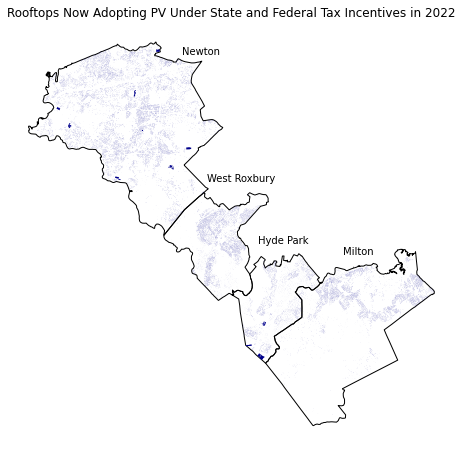

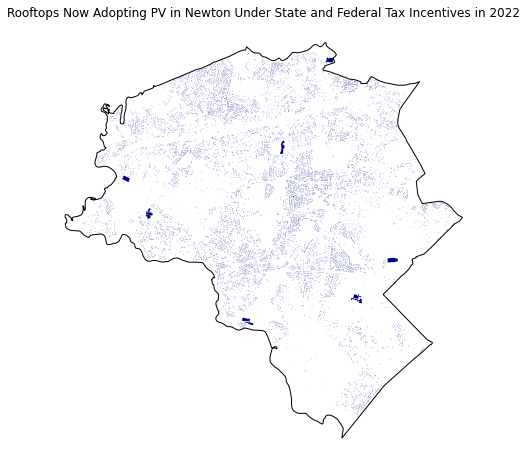

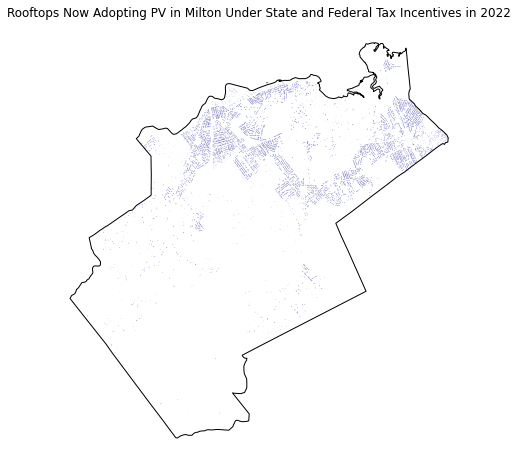

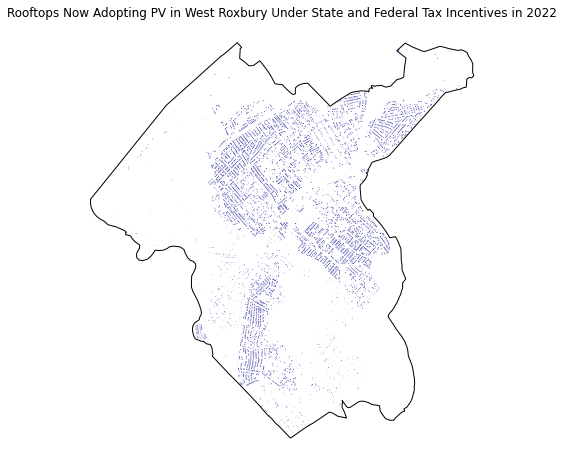

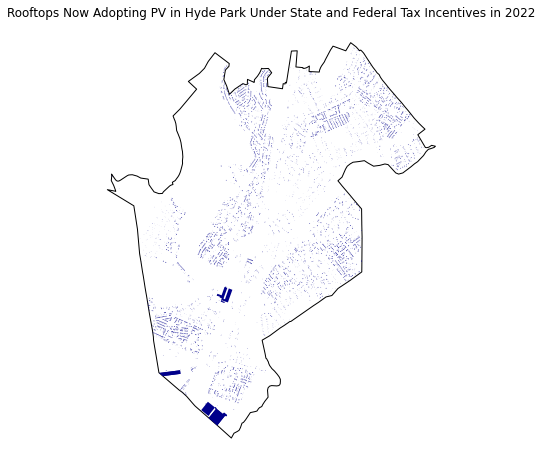

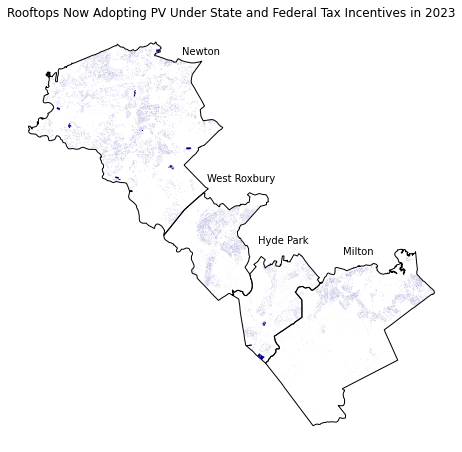

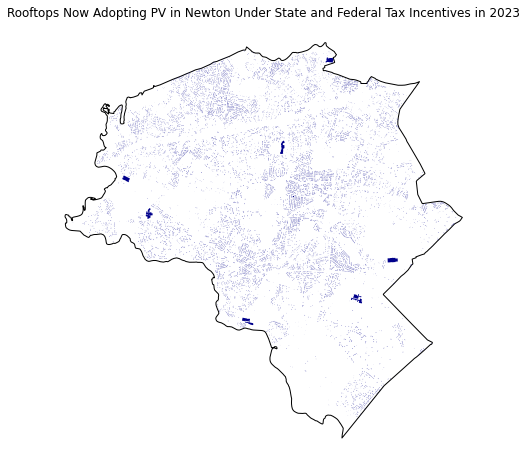

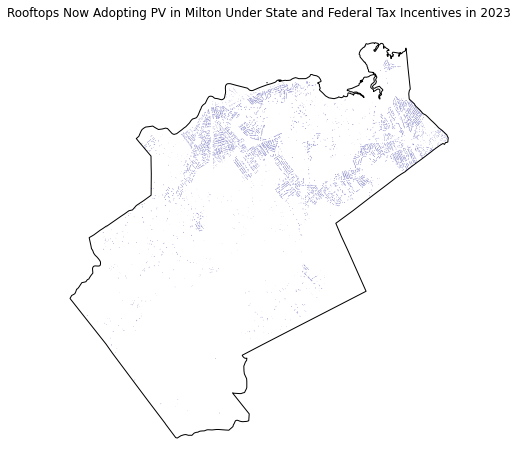

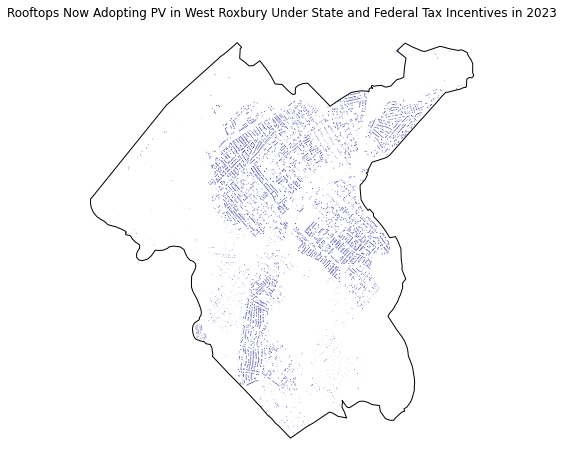

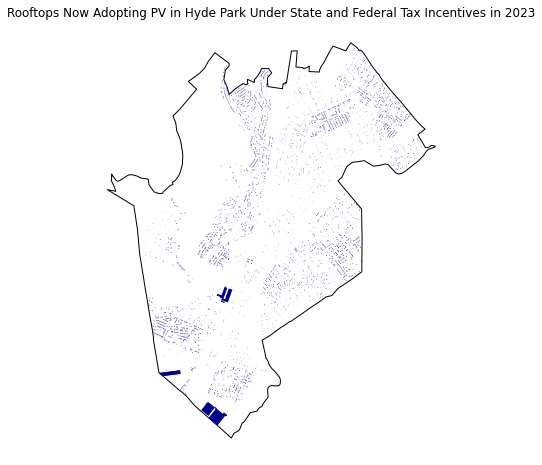

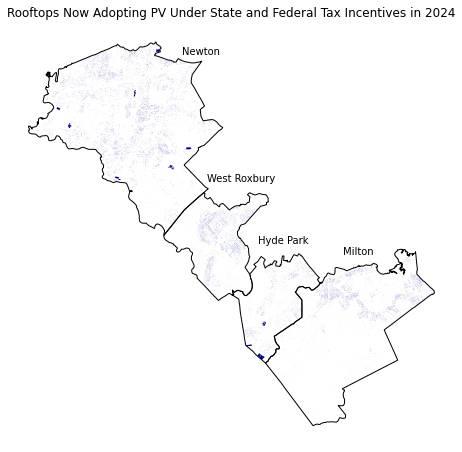

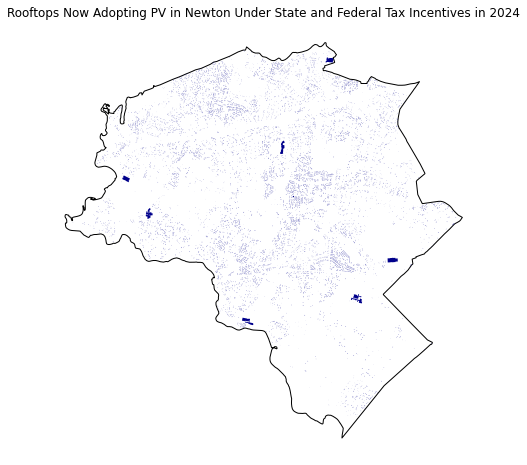

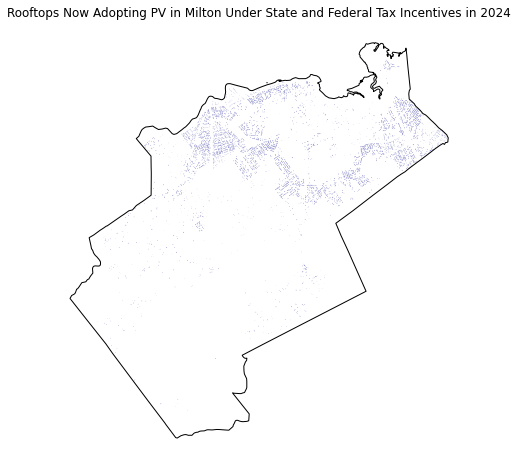

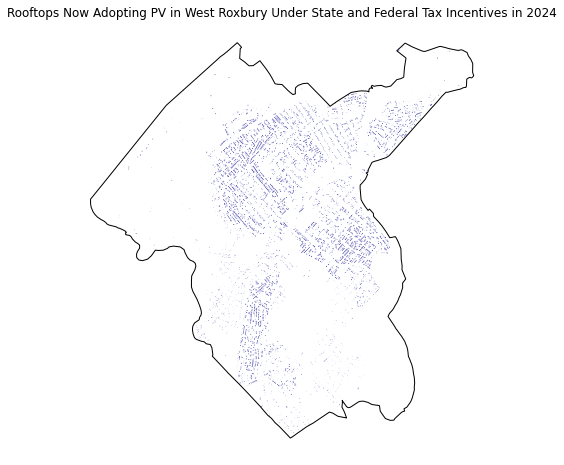

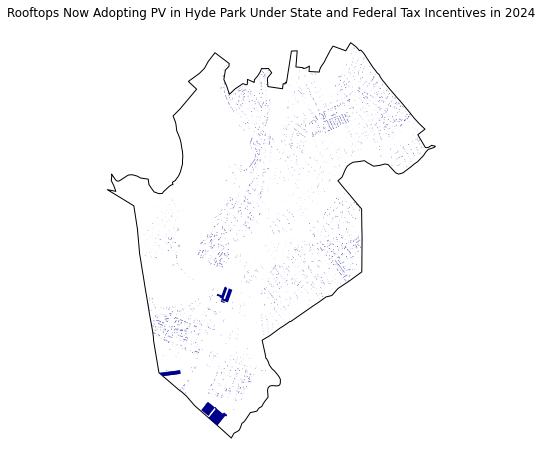

In [152]:
# Plot all of the scenarios

scen = {'22': [sel22, 'State and Federal Tax Incentives in 2022', 'MA+Fed22'],
        '23': [sel23, 'State and Federal Tax Incentives in 2023', 'MA+Fed23'],
        '24': [sel24, 'State and Federal Tax Incentives in 2024', 'MA+Fed24']
       }

for k in scen.keys():
    
    # All towns together
    plot_scenario(scen[k][0], scen[k][1], scen[k][2])
    
    # By town
    plot_scenario_by_town(scen[k][0], scen[k][1], scen[k][2])

### Capped Payments for Emissions Avoided

In [54]:
# Convert emissions avoided by each rooftop PV system into MTCO2e

data['emAvo_MT'] = data['emAvo_lbs'] / 2205
data

,STRUCT_ID,SOURCE,TOWN_ID,TOWN_ID2,LOCAL_ID,AREA_SQ_FT,AREA_SQMI,index,CITY_TOWN,COUNTY,...,PVcostEst,incentMA,incentFed22,incentFed23,incentFed24,PVcostMA,PVcostMA+Fed22,PVcostMA+Fed23,PVcostMA+Fed24,emAvo_MT
0,228564_891904,City of Boston,35,0,Bos_2003474000_B1,524.705830,5.350249,West Roxbury,BOSTON,SUFFOLK,...,15826.91,920.2425,7656.4150,6478.5050,0.0,14906.6675,7250.2525,8428.1625,14906.6675,30.516228
1,228744_891768,City of Boston,35,0,Bos_2003510000_B0,1235.985434,5.350249,West Roxbury,BOSTON,SUFFOLK,...,37290.93,920.2425,7656.4150,6478.5050,0.0,36370.6875,28714.2725,29892.1825,36370.6875,71.901494
2,228721_891681,City of Boston,35,0,Bos_2003527000_B0,1281.687169,5.350249,West Roxbury,BOSTON,SUFFOLK,...,38669.80,920.2425,7656.4150,6478.5050,0.0,37749.5575,30093.1425,31271.0525,37749.5575,74.560120
3,229467_887834,City of Boston,35,0,Bos_1812932003_B0,1107.685557,4.440987,Hyde Park,BOSTON,SUFFOLK,...,33369.35,859.1790,7148.3672,6048.6184,0.0,32510.1710,25361.8038,26461.5526,32510.1710,64.340196
4,229842_887062,City of Boston,35,0,Bos_1812996000_B0,1235.355673,4.440987,Hyde Park,BOSTON,SUFFOLK,...,37177.83,749.8425,6238.6948,5278.8956,0.0,36427.9875,30189.2927,31149.0919,36427.9875,71.683408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65244,232602_889575,MAGIS,189,0,None,3318.360000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,100042.42,887.0550,7380.2924,6244.8628,0.0,99155.3650,91775.0726,92910.5022,99155.3650,192.894049
65245,233037_889542,MAGIS,189,0,None,2043.410000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,61620.59,729.2310,6067.1988,5133.7836,0.0,60891.3590,54824.1602,55757.5754,60891.3590,118.812065
65246,233261_889588,MAGIS,189,0,None,1100.700000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,33200.85,729.2310,6067.1988,5133.7836,0.0,32471.6190,26404.4202,27337.8354,32471.6190,64.015320
65247,234126_889280,MAGIS,189,0,None,1562.920000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,47131.05,951.9750,7920.4346,6701.9062,0.0,46179.0750,38258.6404,39477.1688,46179.0750,90.874446


In [55]:
# Compute how much would be paid for each rooftop system, under each of the
# payment schemes ($3, $45, or $120 / MTCO2e)

data['emPay3']   = round(data['emAvo_MT'] * 3, 2)
data['emPay45']  = round(data['emAvo_MT'] * 45, 2)
data['emPay120'] = round(data['emAvo_MT'] * 120, 2)
data

,STRUCT_ID,SOURCE,TOWN_ID,TOWN_ID2,LOCAL_ID,AREA_SQ_FT,AREA_SQMI,index,CITY_TOWN,COUNTY,...,incentFed23,incentFed24,PVcostMA,PVcostMA+Fed22,PVcostMA+Fed23,PVcostMA+Fed24,emAvo_MT,emPay3,emPay45,emPay120
0,228564_891904,City of Boston,35,0,Bos_2003474000_B1,524.705830,5.350249,West Roxbury,BOSTON,SUFFOLK,...,6478.5050,0.0,14906.6675,7250.2525,8428.1625,14906.6675,30.516228,91.55,1373.23,3661.95
1,228744_891768,City of Boston,35,0,Bos_2003510000_B0,1235.985434,5.350249,West Roxbury,BOSTON,SUFFOLK,...,6478.5050,0.0,36370.6875,28714.2725,29892.1825,36370.6875,71.901494,215.70,3235.57,8628.18
2,228721_891681,City of Boston,35,0,Bos_2003527000_B0,1281.687169,5.350249,West Roxbury,BOSTON,SUFFOLK,...,6478.5050,0.0,37749.5575,30093.1425,31271.0525,37749.5575,74.560120,223.68,3355.21,8947.21
3,229467_887834,City of Boston,35,0,Bos_1812932003_B0,1107.685557,4.440987,Hyde Park,BOSTON,SUFFOLK,...,6048.6184,0.0,32510.1710,25361.8038,26461.5526,32510.1710,64.340196,193.02,2895.31,7720.82
4,229842_887062,City of Boston,35,0,Bos_1812996000_B0,1235.355673,4.440987,Hyde Park,BOSTON,SUFFOLK,...,5278.8956,0.0,36427.9875,30189.2927,31149.0919,36427.9875,71.683408,215.05,3225.75,8602.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65244,232602_889575,MAGIS,189,0,None,3318.360000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,6244.8628,0.0,99155.3650,91775.0726,92910.5022,99155.3650,192.894049,578.68,8680.23,23147.29
65245,233037_889542,MAGIS,189,0,None,2043.410000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,5133.7836,0.0,60891.3590,54824.1602,55757.5754,60891.3590,118.812065,356.44,5346.54,14257.45
65246,233261_889588,MAGIS,189,0,None,1100.700000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,5133.7836,0.0,32471.6190,26404.4202,27337.8354,32471.6190,64.015320,192.05,2880.69,7681.84
65247,234126_889280,MAGIS,189,0,None,1562.920000,13.297527,Milton,"MILTON, TOWN OF",NORFOLK,...,6701.9062,0.0,46179.0750,38258.6404,39477.1688,46179.0750,90.874446,272.62,4089.35,10904.93


In [68]:
# Compute the cost of installation after the payments

data['PVcostEm3']   = data['PVcostEst'] - data['emPay3']
data['PVcostEm45']  = data['PVcostEst'] - data['emPay45']
data['PVcostEm120'] = data['PVcostEst'] - data['emPay120']

In [71]:
def selections_em_capped(data, scenario_texts, BUDGET=1000000):
    
    data_c = data.copy()
    
    # First, sort the data
    data_c = data_c.sort_values(by='emAvo_lbs', ascending=False)
    
    payments = ['3', '45', '120']
    cost = 'PVcostEm'
    
    N = []
    A = []
    M = []
    E = []
    C_M  = []
    C_F  = []
    C_I  = []
    mC_I = []
        
    for i in range(3):
        
        costStr = cost + payments[i]
        
        # Create a new column for the cumulative expense
        data_c['emPayCumul' + payments[i]] = data_c['emPay' + payments[i]].cumsum()
        
        i_sel  = data_c[costStr].lt(data_c['wAvgInc_l']*0.28)
        i_sel &= data_c['emPayCumul' + payments[i]].lt(BUDGET)
        
        selected = data_c[i_sel]
    
        # Count how many roofs were selected
        n = len(selected)
        N.append(n)
    
        # Compute the total area of those roofs in square kilometers
        area = round(selected['area_sq_m'].sum() / 1000000, 2)
        A.append(area)
    
        # Compute the total MW generated by installing PV on those roofs
        MW = round(selected['kW'].sum() * 0.001, 2)
        M.append(MW)
    
        # Compute the total emissions saved by installing PV on those roofs
        # and convert to MTCO2e
        em = round(selected['emAvo_MT'].sum(), 2)
        E.append(em)
    
        # Compute the total cost for the state
        costMA = round(selected['emPay' + payments[i]].sum(), 2)
        C_M.append(costMA)
        
        # Compute the total cost for the fed. govt. (in this case, 0)
        costF = 0.00
        C_F.append(costF)
    
        # Compute the total cost for the building owners
        costInd = round(selected['PVcostEm' + payments[i]].sum(), 2)
        C_I.append(costInd)
    
        # Compute the average cost for the building owners
        meanCostInd = round(selected['PVcostEm' + payments[i]].mean(), 2)
        mC_I.append(meanCostInd)
    
    
    results = pd.DataFrame(zip(N, A, M, E, C_M, C_F, C_I, mC_I),
                          columns=['n', 'area_km^2', 'MW', 'avoidedMTCO2e',
                                   'costForMA', 'costForFed', 
                                   'costForIndividuals',
                                   'avgCostForIndividuals'],
                          index=scenario_texts)
    
    return results

In [72]:
selections_em_capped(data, ['$3/MTCO2e_capped', '$45/MTCO2e_capped', 
                            '$120/MTCO2e_capped'])

,n,area_km^2,MW,avoidedMTCO2e,costForMA,costForFed,costForIndividuals,avgCostForIndividuals
$3/MTCO2e_capped,14,0.28,40.70,173429.43,520288.28,0.0,-520288.28,-37163.45
$45/MTCO2e_capped,1,0.03,4.15,17668.24,795070.77,0.0,-795070.77,-795070.77
$120/MTCO2e_capped,0,0.00,0.00,0.00,0.00,0.0,0.00,NaN


In [40]:
# TODO:
#   1. Try plotting each town separately - might be able to see the roofs better
#   2. To incentive summary tables, add n_eachTown to see where each incentive 
#      was most effective
#   3. Instead of 28% across the board, use the town-specific income/cost ratio?
#   4. Introduce a reasonable per-system cap on the carbon payments (100%? 50%?)
#   5. When plotting rooftops w/ solar bc of incentives, remember to plot
#      roofs w/ costEst = 0 w/ neutral color as "no cost data" (eg. Tasmania)
#   6. Find out what filled roofprints are (look at MassGIS documentation)
#   6. net metering as another incentive program?